# Bike sharing assignment

Problem Statement:  A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue and want to understand the factors affecting the demand for these shared bikes in the American market

# Step 1: Reading and Understanding the Data

In [44]:
#Importing all the packages/libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [45]:
#Reading the csv dataset into a dataframe
df = pd.read_csv('bike-sharing-dataset.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/18,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02/01/18,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03/01/18,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04/01/18,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05/01/18,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Dropping Drop below variables as they dont add any info :
###### - Instant (as this is just like an row identifier and contains no data)
###### - dteday (as we already have 'yr' attribute, so this is duplicate data / will not help add much detail to our model)
###### - casual ( as cnt is sum count of casual and registered)
###### - registered  ( as cnt is sum count of casual and registered)

In [46]:
#Dropping Drop below variables wth above reasoning
bike = df.drop('instant', axis =1)
bike = bike.drop('dteday', axis =1)
bike = bike.drop('casual', axis =1)
bike = bike.drop('registered', axis =1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [47]:
#Checking shpae of bike dataframe
bike.shape

(730, 12)

In [48]:
#Checking overall structute of the bike dataframe. 
#We can see that there are no records having null values, so there is no need to do any missing data imputation.
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [49]:
#Checking high level descriptive statistics/summary of all the variables
bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


# Step 2: Visualising the Data

## Visualising Numeric Variables 

Initially, making a pairplot of all the numeric variables

<Figure size 576x576 with 0 Axes>

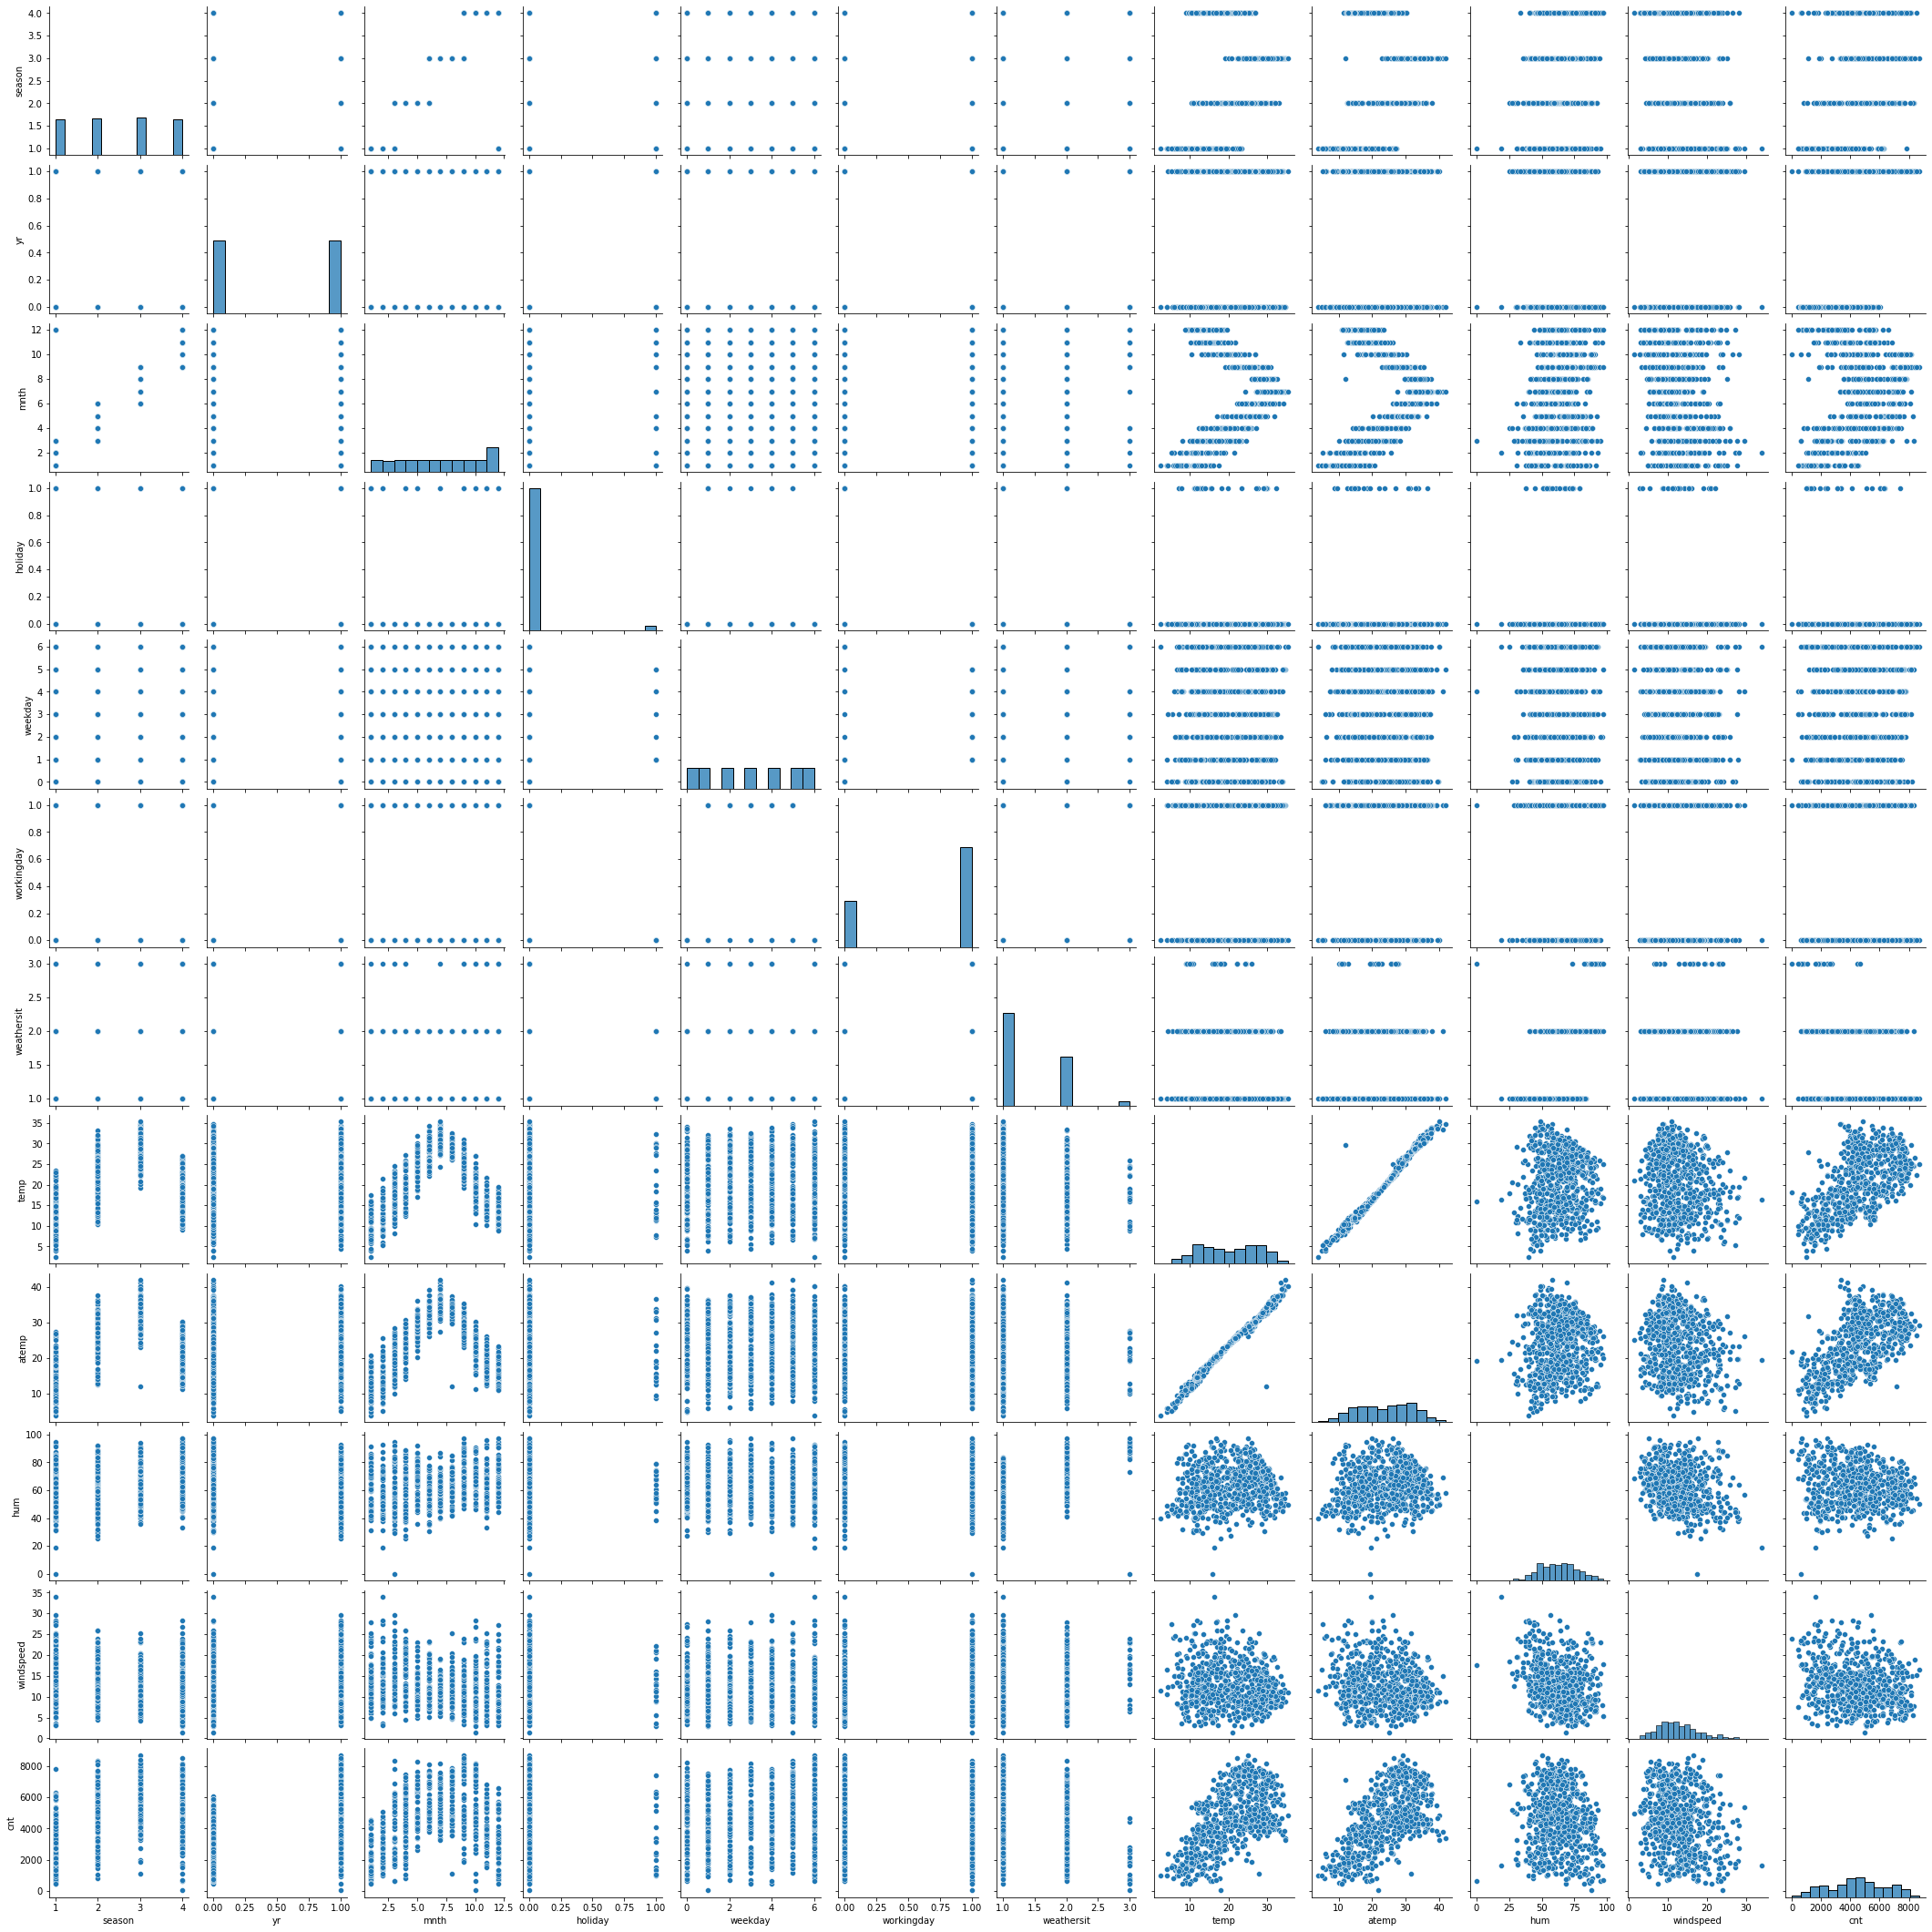

In [50]:
plt.figure(figsize=(8,8))
sns.pairplot(bike)

Checking correlation between all the variables

<AxesSubplot:>

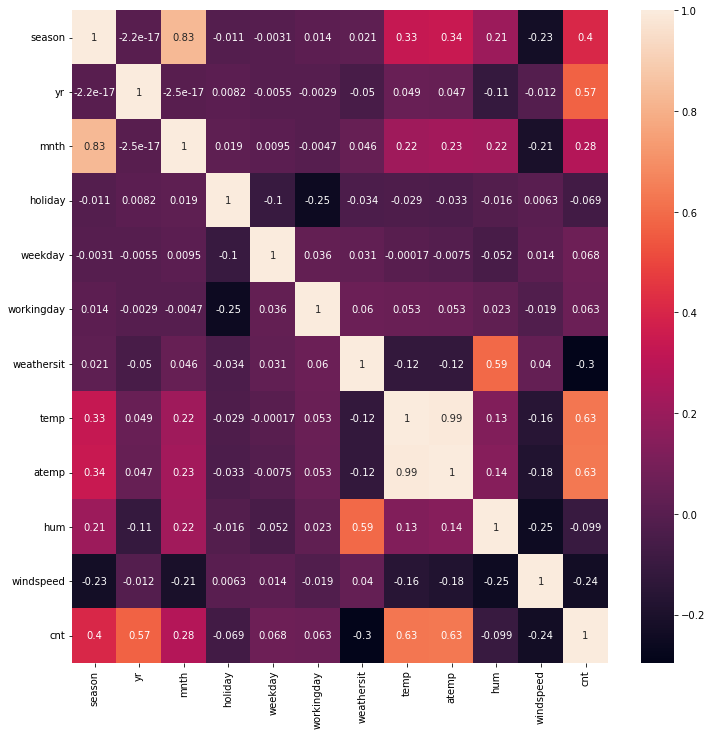

In [51]:
plt.figure(figsize=(12,12))
sns.heatmap(bike.corr(),annot=True)

Looking at the pair-plot among the numerical variables, 'temp' variable has the highest correlation of 0.63
with the 'cnt' target variable, followed by 'yr' with correlationof 0.57 with 'cnt' target variable

# Step 3: Data Preparation

Below categorical variables need to be converted to dummy variable to avoid order between them (ordinal variables)
- Season
- Month
- Weekday
- weather_sit

## Dummy variables

In [52]:
#Creating dummy variable for season
season_dummy_var = pd.get_dummies(bike['season'], drop_first = True, prefix='season')
season_dummy_var.value_counts()

season_2  season_3  season_4
0         1         0           188
1         0         0           184
0         0         0           180
                    1           178
dtype: int64

In [53]:
#Creating dummy variable for month
month_dummy_var = pd.get_dummies(bike['mnth'], drop_first = True, prefix='month')
month_dummy_var.value_counts()

month_2  month_3  month_4  month_5  month_6  month_7  month_8  month_9  month_10  month_11  month_12
0        1        0        0        0        0        0        0        0         0         0           62
         0        0        1        0        0        0        0        0         0         0           62
                           0        0        1        0        0        0         0         0           62
                                             0        1        0        0         0         0           62
                                                      0        0        1         0         0           62
                                                                        0         0         1           62
                                                                                            0           62
                  1        0        0        0        0        0        0         0         0           60
                  0        0        1      

In [54]:
#Creating dummy variable for weekday
weekday_dummy_var = pd.get_dummies(bike['weekday'], drop_first = True, prefix='weekday')
weekday_dummy_var.value_counts()

weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  weekday_6
1          0          0          0          0          0            105
0          0          0          0          0          1            105
                                                       0            105
           1          0          0          0          0            104
           0          0          1          0          0            104
                                 0          1          0            104
                      1          0          0          0            103
dtype: int64

In [55]:
#Creating dummy variable for weathersit
weathersit_dummy_var = pd.get_dummies(bike['weathersit'], drop_first = True, prefix='weathersit')
weathersit_dummy_var.value_counts()

weathersit_2  weathersit_3
0             0               463
1             0               246
0             1                21
dtype: int64

In [56]:
#Concatenate all created dummy variables to roiginal 'bike' dataframe
bike = pd.concat([bike,season_dummy_var],axis = 1)
bike = pd.concat([bike,month_dummy_var],axis = 1)
bike = pd.concat([bike,weekday_dummy_var],axis = 1)
bike = pd.concat([bike,weathersit_dummy_var],axis = 1)

In [57]:
#Check details of 'bike' dataframe post addition of dummy variables
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season        730 non-null    int64  
 1   yr            730 non-null    int64  
 2   mnth          730 non-null    int64  
 3   holiday       730 non-null    int64  
 4   weekday       730 non-null    int64  
 5   workingday    730 non-null    int64  
 6   weathersit    730 non-null    int64  
 7   temp          730 non-null    float64
 8   atemp         730 non-null    float64
 9   hum           730 non-null    float64
 10  windspeed     730 non-null    float64
 11  cnt           730 non-null    int64  
 12  season_2      730 non-null    uint8  
 13  season_3      730 non-null    uint8  
 14  season_4      730 non-null    uint8  
 15  month_2       730 non-null    uint8  
 16  month_3       730 non-null    uint8  
 17  month_4       730 non-null    uint8  
 18  month_5       730 non-null    

In [58]:
#Drop the below 4 variables as their respective dummy variables have already been concatenated in 'bike' dataframe
bike.drop(['season'], axis = 1, inplace = True)
bike.drop(['mnth'], axis = 1, inplace = True)
bike.drop(['weekday'], axis = 1, inplace = True)
bike.drop(['weathersit'], axis = 1, inplace = True)

In [59]:
#Check details of 'bike' dataframe post addition of dummy variables & dropping of the below 4 variables
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  month_2       730 non-null    uint8  
 12  month_3       730 non-null    uint8  
 13  month_4       730 non-null    uint8  
 14  month_5       730 non-null    uint8  
 15  month_6       730 non-null    uint8  
 16  month_7       730 non-null    uint8  
 17  month_8       730 non-null    uint8  
 18  month_9       730 non-null    

## Rescaling the Features

All the below columns have small float values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

Min-Max scaling
Standardisation (mean-0, sigma-1)
This time, we will use MinMax scaling.

In [60]:
#Create an instance of MinMaxScaler and view their values before performing scaling operation
scaler = MinMaxScaler()
num_vars = ['temp', 'atemp', 'hum', 'windspeed']
bike[num_vars].head()

,temp,atemp,hum,windspeed
0,14.110847,18.18125,80.5833,10.749882
1,14.902598,17.68695,69.6087,16.652113
2,8.050924,9.47025,43.7273,16.636703
3,8.200000,10.60610,59.0435,10.739832
4,9.305237,11.46350,43.6957,12.522300


In [61]:
#Apply scaling on 'temp', 'atemp', 'hum', 'windspeed' 
bike[num_vars] = scaler.fit_transform(bike[num_vars])
bike[num_vars].head()

,temp,atemp,hum,windspeed
0,0.355170,0.373517,0.828620,0.284606
1,0.379232,0.360541,0.715771,0.466215
2,0.171000,0.144830,0.449638,0.465740
3,0.175530,0.174649,0.607131,0.284297
4,0.209120,0.197158,0.449313,0.339143


In [62]:
#Check details of 'bike' dataframe post scaling operation
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,0.355170,0.373517,0.828620,0.284606,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0.379232,0.360541,0.715771,0.466215,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0.171000,0.144830,0.449638,0.465740,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0.175530,0.174649,0.607131,0.284297,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0.209120,0.197158,0.449313,0.339143,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


# Step 4: Splitting the Data into Training and Testing Sets

<AxesSubplot:>

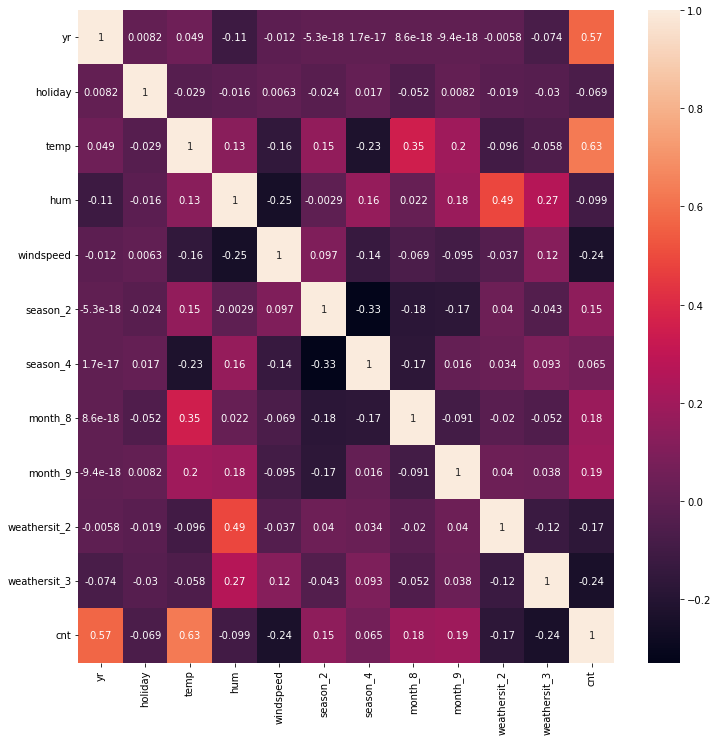

In [63]:
plt.figure(figsize=(12,12))
bike_temp = bike
all_columns = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2','season_4', 'month_8', 'month_9', 'weathersit_2', 'weathersit_3','cnt']
bike_temp = bike_temp[all_columns]
sns.heatmap(bike_temp.corr(),annot=True)

In [64]:
#Dividing into X and Y sets for the model building

y = bike.pop('cnt')
X = bike

In [65]:
#Creating X_train, X_test, y_train, y_test using the sklearn's train_test_split
#Train size chosen is 70% of total observations
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)

In [66]:
#Displaying shpae of X_train, X_test, y_train, y_test 
print("X_train.shape",X_train.shape)
print("y_train.shape",y_train.shape)
print("X_test.shape",X_test.shape)
print("y_test.shape",y_test.shape)

X_train.shape (510, 29)
y_train.shape (510,)
X_test.shape (220, 29)
y_test.shape (220,)


# Step 5: Building our model using RFE ( Recursive Feature Elimination )

Please note that an automated + Manual approach for variable selection is being followed in this assignment.<br><br>
We start with <b>automated approach of RFE</b> and ss per standard practice, I have taken variable count as 12 to start with and then observed the RFE Support and RFE ranking. <br><br>
Then, we take the top 12 features/variables, build a model using statsmodels, take into consideration the p-value and VIF values for all the features. Accordingly, if required, we <b>proceed to eliminate features one by one using a manual approach.</b><br><br>

Below is prioirty of dropping variables used in manual approach :- <br>
<ol>
    <li>Variable has high p-value and High VIF --> Drop it</li>
    <li>Variable has high p-value and Low VIF --> Drop it before next condition</li>
    <li>Variable has Low p-value and High VIF -->Drop it</li>
    <li>Variable has Low p-value and Low VIF --> Keep the variable</li>
    
</ol>

In [67]:
## Running RFE with the output number of the variable equal to 12
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 12)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [68]:
#Finding which 8 variables RFE has chosen and respective rankings
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 9),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 4),
 ('season_4', True, 1),
 ('month_2', False, 10),
 ('month_3', False, 5),
 ('month_4', False, 7),
 ('month_5', False, 6),
 ('month_6', False, 8),
 ('month_7', False, 11),
 ('month_8', True, 1),
 ('month_9', True, 1),
 ('month_10', False, 3),
 ('month_11', False, 12),
 ('month_12', False, 13),
 ('weekday_1', False, 14),
 ('weekday_2', False, 15),
 ('weekday_3', False, 17),
 ('weekday_4', False, 18),
 ('weekday_5', False, 16),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [69]:
#Creating variable which contains all the varaibles chosen by RFE model
rfe_scope = X_train.columns[rfe.support_]
rfe_scope

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_4',
       'month_8', 'month_9', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

### Step 5.1 Building model using statsmodel, for the detailed statistics

In [70]:
#Adding constant to stats model
X_train_rfe = X_train[rfe_scope]
X_train_rfe = sm.add_constant(X_train_rfe)

#Creating a statsmodel using OLS (Ordinary Least Squares) and fitting it to the training data
lr = sm.OLS(y_train,X_train_rfe).fit()

In [71]:
#Getting detailed insights for interpreation provided by stats model like R-squared, Adjusted R-squared, Beta coefficients and p-value for all variables
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.2
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          4.20e-190
Time:                        10:44:43   Log-Likelihood:                -4116.9
No. Observations:                 510   AIC:                             8260.
Df Residuals:                     497   BIC:                             8315.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2071.8715    240.728      8.607      0.000    1598.902    2544.841
yr            1990.2877     70.561     28.207      0.000    1851.653    2128.923
holiday       -804.7666    223.008     -3.609      0.000   -1242.922    -366.611
temp          4697.6873    191.279     24.559      0.000    4321.873    5073.502
hum          -1522.9590    326.390     -4.666      0.000   -2164.234    -881.684
windspeed    -1676.1154    232.456     -7.210      0.000   -2132.833   -1219.398
season_2       905.5729     94.543      9.578      0.000     719.820    1091.326
season_4      1275.5746     92.627     13.771      0.000    1093.585    1457.564
month_8        475.5053    141.715      3.355      0.001     197.070     753.941
month_9       1060.7402    140.773      7.535      0.000     784.157    1337.324
weekday_6      140.0781     96.795      1.447      0.148     -50.101     330.257
weathersit_2  -463.3020     91.209     -5.080      0.000    -642.504    -284.100
weathersit_3 -2041.5870    228.678     -8.928      0.000   -2490.881   -1592.293
==============================================================================
Omnibus:                       61.236   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.479
Skew:                          -0.675   Prob(JB):                     1.26e-28
Kurtosis:                       5.055   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Our training model shows R-squared values as 80.5 and Adjusted R-squared value as 80.2. Also, all variables have p-value < 0.05, which indicate that the variables are significant

### Step 5.1.1 Calculating VIF for the model

In [72]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,47.91
4,hum,1.86
11,weathersit_2,1.55
3,temp,1.54
8,month_8,1.44
6,season_2,1.37
7,season_4,1.32
12,weathersit_3,1.23
9,month_9,1.21
5,windspeed,1.18









### Step 5.2 dropping 'weekday_6' variable as its p-value(0.148) is higher than (0.05)

In [73]:
#Before dropping weekday_6 variable as its p-value(0.148) is higher than (0.05)
X_train_rfe.head()

,const,yr,holiday,temp,hum,windspeed,season_2,season_4,month_8,month_9,weekday_6,weathersit_2,weathersit_3
576,1.0,1,0,0.815169,0.724079,0.294871,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.638817,0.285911,0,0,0,0,1,1,0
728,1.0,1,0,0.245101,0.497001,0.676936,0,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.503427,0.221789,1,0,0,0,1,1,0
111,1.0,0,0,0.345824,0.750214,0.406392,1,0,0,0,0,1,0


In [74]:
X_train_rfe.drop(['weekday_6'], axis = 1, inplace = True)

In [75]:
#After dropping weekday_6 variable 
X_train_rfe.head()

,const,yr,holiday,temp,hum,windspeed,season_2,season_4,month_8,month_9,weathersit_2,weathersit_3
576,1.0,1,0,0.815169,0.724079,0.294871,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.638817,0.285911,0,0,0,0,1,0
728,1.0,1,0,0.245101,0.497001,0.676936,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.503427,0.221789,1,0,0,0,1,0
111,1.0,0,0,0.345824,0.750214,0.406392,1,0,0,0,1,0


### Step 5.3- Again training model using statsmodels with new X_train_rfe (i.e without weekday_6)

In [76]:
lr = sm.OLS(y_train,X_train_rfe).fit()

In [77]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     239.5
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          7.50e-191
Time:                        10:45:01   Log-Likelihood:                -4117.9
No. Observations:                 510   AIC:                             8260.
Df Residuals:                     498   BIC:                             8311.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2108.3028    239.671      8.797      0.000    1637.412    2579.193
yr            1986.6570     70.594     28.142      0.000    1847.958    2125.356
holiday       -828.1994    222.664     -3.720      0.000   -1265.676    -390.723
temp          4690.8361    191.430     24.504      0.000    4314.726    5066.946
hum          -1546.7261    326.335     -4.740      0.000   -2187.888    -905.564
windspeed    -1665.6437    232.599     -7.161      0.000   -2122.639   -1208.648
season_2       904.9010     94.646      9.561      0.000     718.947    1090.855
season_4      1278.9715     92.699     13.797      0.000    1096.842    1461.102
month_8        481.0181    141.820      3.392      0.001     202.379     759.657
month_9       1063.9061    140.911      7.550      0.000     787.054    1340.759
weathersit_2  -459.1888     91.265     -5.031      0.000    -638.500    -279.878
weathersit_3 -2031.7881    228.828     -8.879      0.000   -2481.376   -1582.200
==============================================================================
Omnibus:                       56.297   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.844
Skew:                          -0.610   Prob(JB):                     1.28e-27
Kurtosis:                       5.083   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Step 5.3.1 Calculating VIF for the model again


In [78]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,47.38
4,hum,1.86
10,weathersit_2,1.55
3,temp,1.54
8,month_8,1.44
6,season_2,1.37
7,season_4,1.32
11,weathersit_3,1.23
9,month_9,1.21
5,windspeed,1.18


<AxesSubplot:>

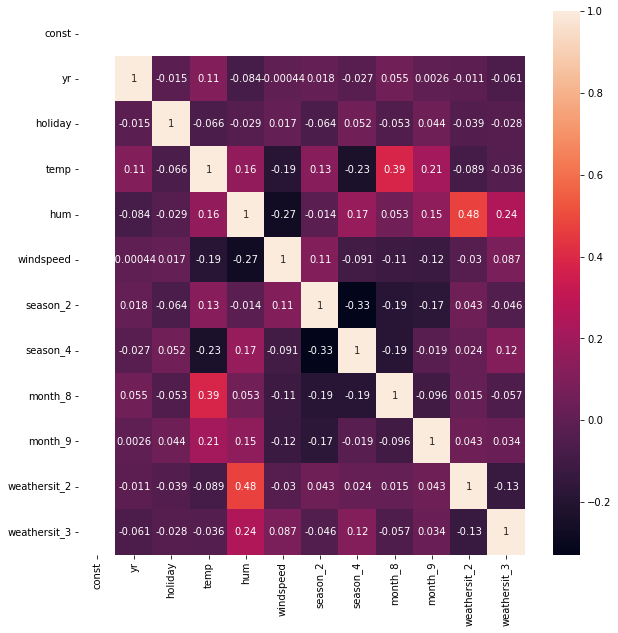

In [79]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train_rfe.corr(),annot=True)

As all the variables have low p-values and low VIF values, we can consider this to be a fairly good model with Adjusted R-square of training model = 0.838 and probability of the F-statistic is 7.50e-191. Hence, we are treating this as last model.<br>
Please note that we did not go with forward/backward approach of manual variable selection as the industry practice is to follow a combined approach of automated+manual to get a final set of predictors and hence same has been followed in the model.

# Step 6: Residual Analysis of the train data

In [80]:
y_train_pred = lr.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

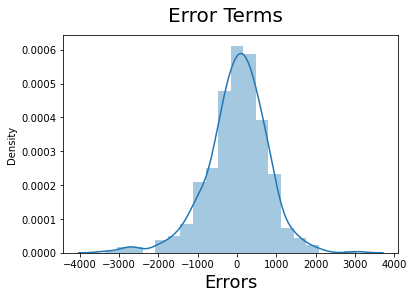

In [81]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)      

<u><b>Validate the assumptions of Linear Regression after building the model on the training set</b></u> :- 
<br> We have plotted a distribution plot which highlights the distribution of error terms. Above distribution plot clearly indicates that the assumptions of Linear refression are satisifed - As we can see a <b>normal distribution (bell shaped curve for error terms) with mean close to 0.</b>

# Step 7 : Making predictions

In [82]:
#Creating X_test dataframe with required variables chosen earlier by RFE model
cols = ['yr','holiday','temp','hum','windspeed','season_2','season_4','month_8','month_9','weathersit_2','weathersit_3']
X_test_rfe = X_test[cols]

In [83]:
#Adding constant to X_test
X_test_rfe = sm.add_constant(X_test_rfe)

In [84]:
y_test_pred = lr.predict(X_test_rfe)

# Step 8 : Model Evaluation

In [85]:
#Calculating r2score for our test dataset predictions 
r2_score(y_test, y_test_pred)

0.8051016394743413

<u><b> Summary of R-squares </b></u> <br>
Adjusted R-square of training model = <b>0.838</b> <br>
Adjusted R-square of training model= <b>0.805</b> <br> <br>

Thus our model has been able to explain almost 83.8% of the total variance and our Adjusted R-square for test dataset is 80.5%. <br>
Hence, we can see that the Adjusted R-square difference between training model & test model is not much and our model is able to make good level of predictions. <br> <br>

<u><b> Summary of Prob (F-statistic) </b></u> <br>

In the above output of lr.summary, we can also see that  the <b> 'Prob (F-statistic)' </b> is less than 0.05, thus we are good to conclude that the overall model fit is significant. We can see that the probability of the F-statistic is 7.50e-191  which is practically a zero value. This means that the model for which this was calculated is definitely significant since it is less than 0.05.

Text(0, 0.5, 'y_test_pred')

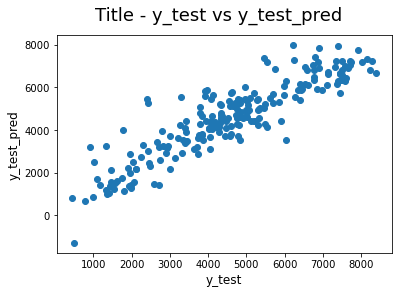

In [86]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('Title - y_test vs y_test_pred', fontsize=18)              # Plot heading 
plt.xlabel('y_test', fontsize=12)                          # X-label
plt.ylabel('y_test_pred', fontsize=12) 

## Observations & Assignment-based Subjective Questions

#### [Q1]Based on the final model, which are the top 3 features contributing significantly towards explaining the demand of the shared bikes?
<ol>
    <li> It is observed that "temp" is a significant variable as it is having high beta coeficient = 4690.8361 and also evident by the fact that it has 0.63 correlation with "cnt" target variable. Thus, people usually prefer to use bikes when temperature is not cold i.e. temperature is conducive for bike riding</li>
    <li>It is observed that "yr" is a significant variable as it is having high beta coeficient = +1986.6570 and also evident by the fact that it has 0.57 correlation with "cnt" target variable. As "yr" takes two values (0 for 2018 and 1 for 2019), we can conclude that the demand for bike-sharing system is increasing on yearly basis.</li>
    <li> It is observed that "windspeed" is a significant variable as it is having high negative beta coeficient = -1665.6437 and also evident by the fact that it has -0.24 correlation with "cnt" target variable. Thus, when windspped increases, the count of the people using bikes goes down as people avoid bike riding in high windy conditions.</li>
    <li>It is observed that "weathersit3" (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) is a significant variable as it is having high negative beta coeficient = -2031.7881 and also evident by the fact that it has -0.24 correlation with "cnt" target variable. This means pople do not prefer such weather conditions (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)</li>
</ol>
<br>

#### [Q2] How did you validate the assumptions of Linear Regression after building the model on the training set?
We have plotted a distribution plot which highlights the distribution of error terms. Above distribution plot clearly indicates that the assumptions of Linear refression are satisifed - As we can see a normal distribution (bell shaped curve for error terms) with mean close to 0. Same has been answered with help of a distrubtion plot in - Step 6: Residual Analysis of the train data.<br><br>

#### [Q3] Looking at the pair-plot among the numerical variables, which one has the highest correlation with the target variable?
Looking at the pair-plot among the numerical variables, 'temp' variable has the highest correlation of 0.63 with the 'cnt' target variable, followed by 'yr' with correlationof 0.57 with 'cnt' target variable. Same has been answered with help of a heatmap in - Step 2 : Visualisaing the data

#### [Q4] Why is it important to use drop_first=True during dummy variable creation? 
drop_first=True is important to use, as it helps in reducing the extra column created during dummy variable creation. Hence it reduces the correlations created among dummy variables i.e. <u>it reduces multi-collinearity</u>

#### [Q5] From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable? 
Below are the categorical variables in the dataset identified in the dataset and their respective correlation value with 'cnt' target variable ( refer the heatmap from - Step 2 : Visualisaing the data:
<ol>
    <li>Season : 0.4</li>
    <li>Month : 0.28</li>
    <li>Weekday : 0.063</li>
    <li>weather_sit : -0.3</li>
</ol>
<br>
But this may not paint the best picture as model may interpreset them as ordinal variables (thus implying, for example that month_1 is less important than month_12 or season_4 is better than season_1).
<br>
Hence, we converted this categorical variables into dummy variables (please refer - # Step 3: Data Preparation) for more details.
<br>
After training the model using training data using an automated approach of RFE + manual method of variable selection, we got 11 variables/fatures from the model that contribute in prediction powers & out of those 11, season_2, season_4, month_8, month_9, weather_sit2 and weather_sit3 are 6 of the dummy variables.
<br>

Below are  their respective correlation value with 'cnt' target variable
<ol>
    <li>weather_sit3 : -0.24</li>
    <li>weather_sit2 : -0.17</li>
    <li>month_8 : 0.18</li>
    <li>month_9 : 0.19</li>
    <li>season_2 - 0.15</li>
    <li>season_4 - 0.0065</li>
</ol>

<br>
The above variable's respective p-values and beta coefficients cn be referred from the # Step 5

Thus we can <u>conclude</u> that among the above 6 variables,  people avoid weather_sit2(Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist) and weather_sit3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds). <br>
Atleast for month_8(August) and month_9(September) and for Season_2(summer), good number of people are expected to use the bike-sharing system


